In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Read dataset
df = pd.read_csv("DiD_data.csv")
df

rssd9001  rssd9999  bhc_avgtradingratio  treat_3_b_avg  after_DFA_1  \
0       1020180  20040930                  0.0              0            0   
1       1020180  20041231                  0.0              0            0   
2       1020180  20050331                  0.0              0            0   
3       1020180  20050630                  0.0              0            0   
4       1020180  20050930                  0.0              0            0   
...         ...       ...                  ...            ...          ...   
81555   3832583  20110331                  NaN              0            1   
81556   3832583  20110630                  NaN              0            1   
81557   3832583  20150331                  0.0              0            1   
81558   3832583  20150630                  0.0              0            1   
81559   3836442  20090331                  NaN              0            0   

       dep_roa1  dep_leverage  dep_lnassets  dep_creditrisk_total3   dep_cir  \
0      0.002772      0.081957     15.601202               0.013304  0.463811   
1      0.003045      0.082480     15.630583               0.009732  0.456392   
2      0.002616      0.082074     15.644925               0.011830  0.444011   
3      0.002647      0.081712     15.679702               0.013654  0.433771   
4      0.002867      0.082944     15.661868               0.012456  0.400985   
...         ...           ...           ...                    ...       ...   
81555       NaN           NaN           NaN                    NaN       NaN   
81556       NaN           NaN     13.061935               0.013621       NaN   
81557  0.005248      0.225874     13.562950               0.008613  0.498866   
81558  0.005353      0.226806     13.558450               0.007032  0.533240   
81559       NaN           NaN     13.456915               0.057848  0.346313   

       dep_depositratio  dep_loans_REratio  dep_liquidity  dep_cpp_bankquarter  
0              0.561805           0.593738       0.024337                    0  
1              0.557617           0.601763       0.025446                    0  
2              0.556980           0.600700       0.025153                    0  
3              0.571642           0.601042       0.023670                    0  
4              0.577408           0.581438       0.029793                    0  
...                 ...                ...            ...                  ...  
81555          0.669560                NaN            NaN                    0  
81556          0.637159           0.001838            NaN                    0  
81557          0.709762           0.001823            NaN                    0  
81558          0.714977           0.001938            NaN                    0  
81559               NaN           0.955785            NaN                    0  

[81560 rows x 14 columns]

In [22]:
df.value_counts()

rssd9001  rssd9999  bhc_avgtradingratio  treat_3_b_avg  after_DFA_1  dep_roa1   dep_leverage  dep_lnassets  dep_creditrisk_total3  dep_cir   dep_depositratio  dep_loans_REratio  dep_liquidity  dep_cpp_bankquarter
1020180   20040930  0.0                  0              0             0.002772  0.081957      15.601202     0.013304               0.463811  0.561805          0.593738           0.024337       0                      1
2141028   20050930  0.0                  0              0             0.002022  0.093833      13.417880     0.004244               0.591956  0.746405          0.909393           0.029452       0                      1
2140115   20050331  0.0                  0              0             0.001327  0.068355      12.963337     0.022619               0.191088  0.344149          0.969718           0.009273       0                      1
          20050630  0.0                  0              0             0.002171  0.068403      12.952232     0.019405               0.

In [23]:
# Check for missing data (NA or NaN values)
missing_data = df.isna()  # or df.isnull()

# Create a Boolean mask for rows with any missing values
rows_with_missing = missing_data.any(axis=1)

# Filter and return only the rows with missing data
rows_with_missing_data = df[rows_with_missing]

print("Rows with Missing Data:")
print(rows_with_missing_data)

# Calculate the total number of rows with missing data
total_rows_with_missing = rows_with_missing.sum()

print("\nTotal Number of Rows with Missing Data:", total_rows_with_missing)


Rows with Missing Data:
       rssd9001  rssd9999  bhc_avgtradingratio  treat_3_b_avg  after_DFA_1  \
40026   1020180  20150331             0.000031              0            1   
40027   1020180  20150630             0.000043              0            1   
40028   1020201  20060331                  NaN              1            0   
40029   1020201  20060630                  NaN              1            0   
40030   1020201  20060930                  NaN              1            0   
...         ...       ...                  ...            ...          ...   
81555   3832583  20110331                  NaN              0            1   
81556   3832583  20110630                  NaN              0            1   
81557   3832583  20150331             0.000000              0            1   
81558   3832583  20150630             0.000000              0            1   
81559   3836442  20090331                  NaN              0            0   

       dep_roa1  dep_leverage  dep_lnas

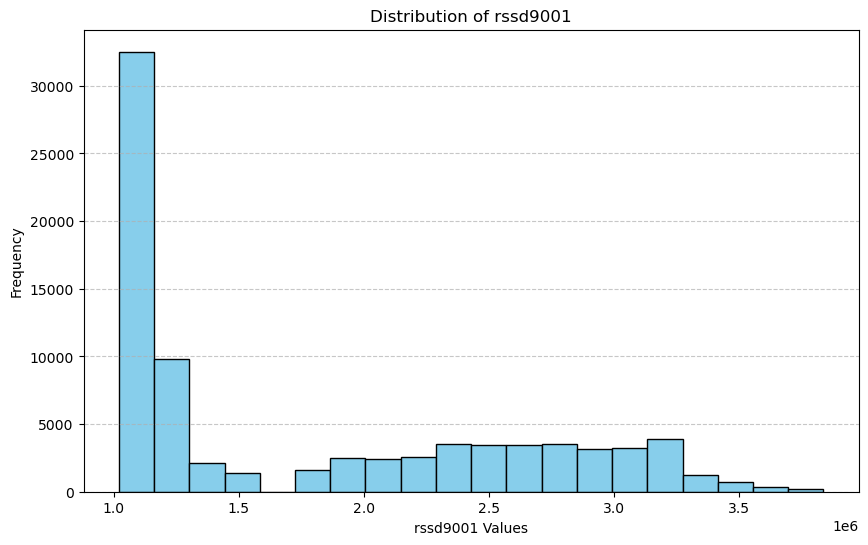

In [24]:
# Assuming 'df' is your DataFrame and 'rssd9001' is the column you want to visualize
plt.figure(figsize=(10, 6))
plt.hist(df['rssd9001'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of rssd9001')
plt.xlabel('rssd9001 Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


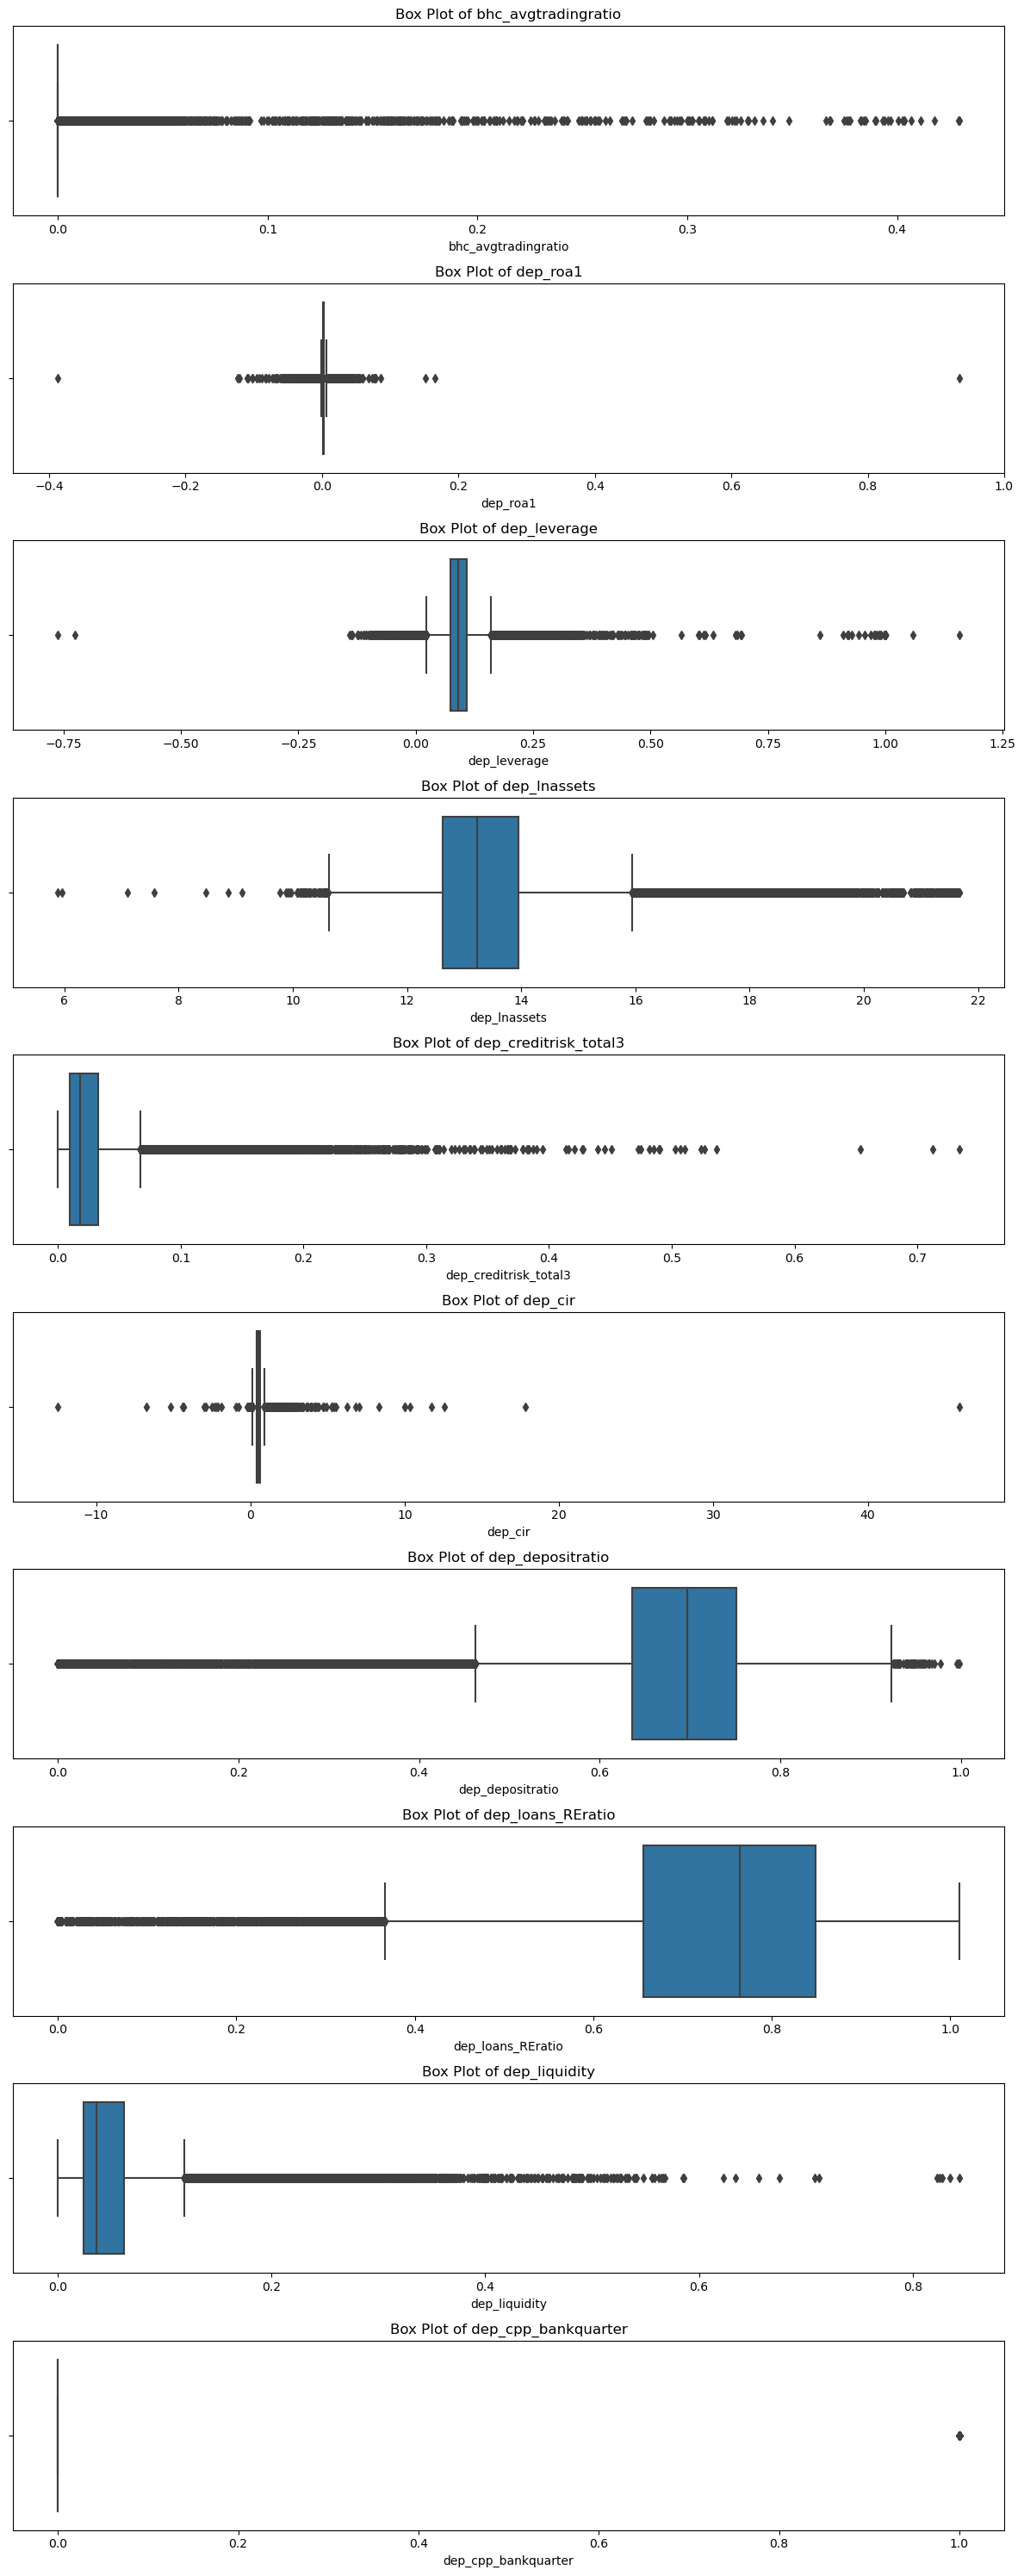

In [25]:
# Extract the time series data for the specified variables
variables = ['bhc_avgtradingratio', 'dep_roa1', 'dep_leverage', 'dep_lnassets', 'dep_creditrisk_total3',
             'dep_cir', 'dep_depositratio', 'dep_loans_REratio', 'dep_liquidity', 'dep_cpp_bankquarter']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(12, 30))

# Iterate through variables and create box plots
for i, variable in enumerate(variables):
    ax = axes[i]
    sns.boxplot(x=df[variable], ax=ax)
    ax.set_xlabel(variable)
    ax.set_title(f'Box Plot of {variable}')

plt.tight_layout()
plt.show()

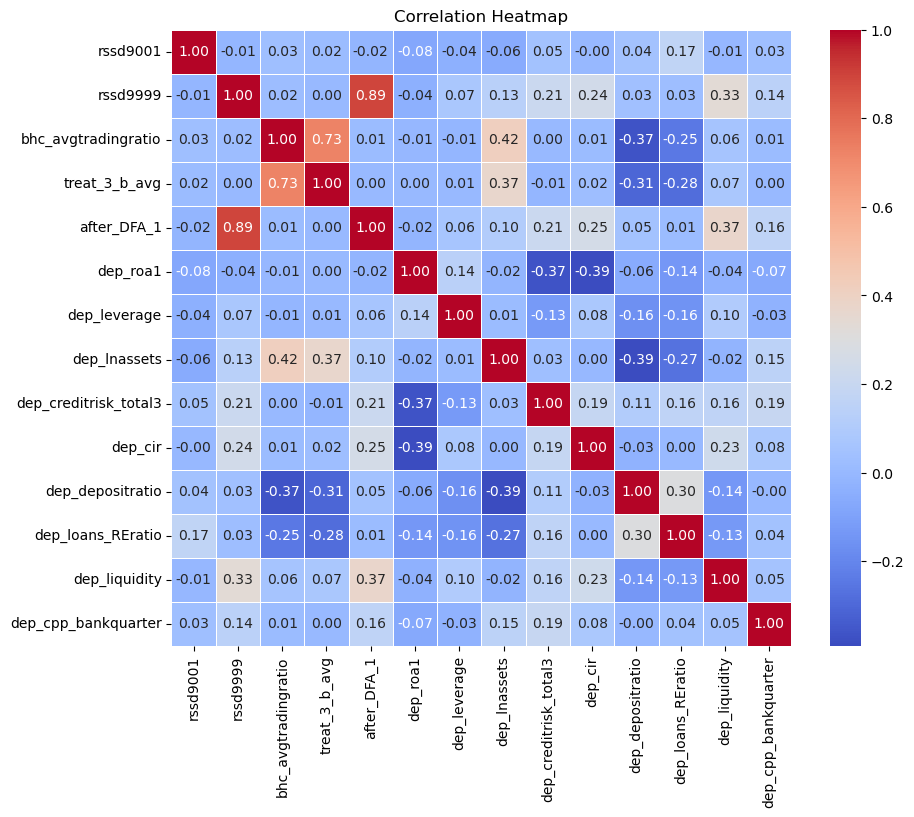

In [26]:
correlation_matrix = df.corr()

# Create Figure
plt.figure(figsize=(10, 8))

# Create heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Distribution of "treat_3_b_avg" VS "time"')

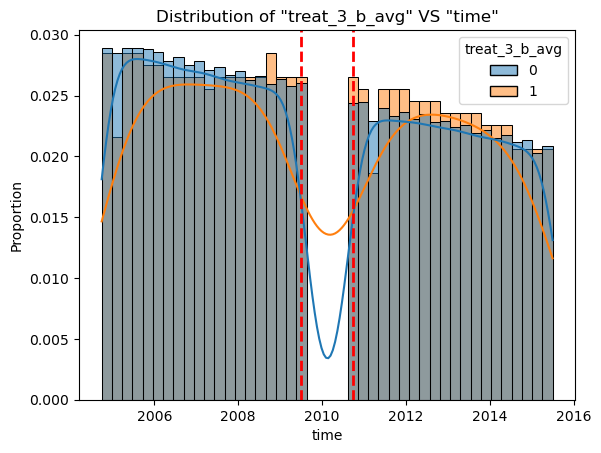

In [27]:
df['time'] = pd.to_datetime(df['rssd9999'], format='%Y%m%d')

sns.histplot(df['treat_3_b_avg'], x = df['time'], hue = df['treat_3_b_avg'], common_norm = False, stat = 'proportion', kde=True, bins = 40+4)
plt.axvline(x=max(df[df["after_DFA_1"] == 0]["time"]), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=min(df[df["after_DFA_1"] == 1]["time"]), color='red', linestyle='dashed', linewidth=2)

plt.title('Distribution of "treat_3_b_avg" VS "time"')


Text(0.5, 1.0, 'Distribution of "after_DFA_1" VS "time"')

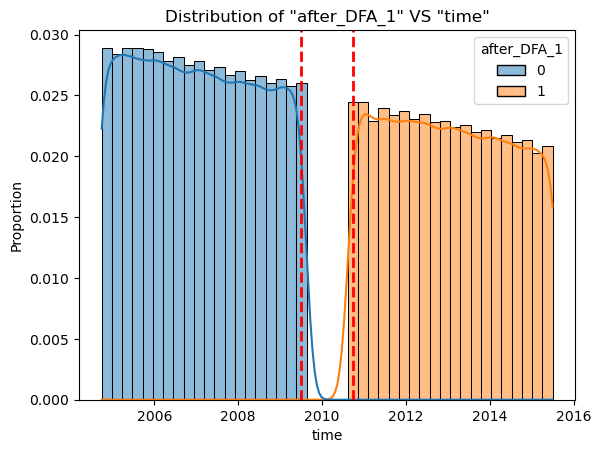

In [28]:
sns.histplot(df['after_DFA_1'], x = df['time'], hue = df['after_DFA_1'], common_norm = True, stat = 'proportion', kde=True, bins = 40+4)
plt.axvline(x=max(df[df["after_DFA_1"] == 0]["time"]), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=min(df[df["after_DFA_1"] == 1]["time"]), color='red', linestyle='dashed', linewidth=2)

plt.title('Distribution of "after_DFA_1" VS "time"')

Text(0.5, 1.0, 'Distribution of "bhc_avgtradingratio" VS "time"')

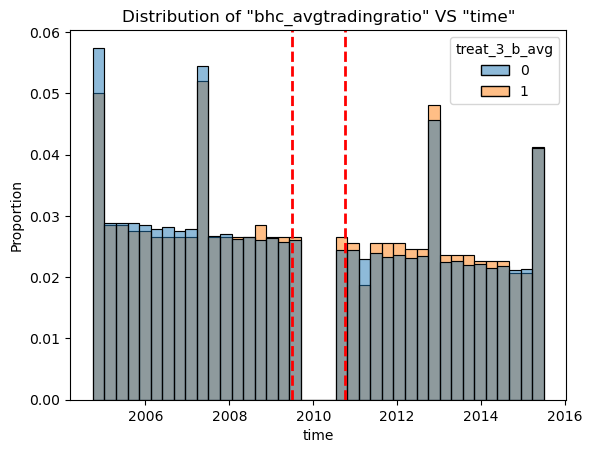

In [29]:
sns.histplot(df['bhc_avgtradingratio'], x = df['time'], hue = df['treat_3_b_avg'], common_norm = False, stat = 'proportion')
plt.axvline(x=max(df[df["after_DFA_1"] == 0]["time"]), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=min(df[df["after_DFA_1"] == 1]["time"]), color='red', linestyle='dashed', linewidth=2)

plt.title('Distribution of "bhc_avgtradingratio" VS "time"')

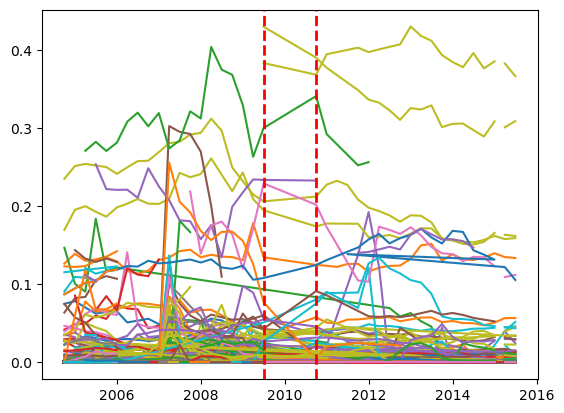

In [30]:
# investment ratio for each bank
for i in df.rssd9001.unique():
    intermediate = df[df['rssd9001'] == i]
    plt.plot(intermediate.time, intermediate.bhc_avgtradingratio)
    
# plt.axhline(y = 0.03, color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=max(df[df["after_DFA_1"] == 0]["time"]), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=min(df[df["after_DFA_1"] == 1]["time"]), color='red', linestyle='dashed', linewidth=2)

plt.show()